# Extract every 5th image from sequence of images

In [13]:
import os
import shutil

from_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Videoer/GP010022/"
to_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Videoer/Annoteringsklar_GP010022/"

# Gather JPEG image files corresponding to each JSON file
imgs = sorted(file for file in os.listdir(from_path) if file.endswith('.jpg'))

every_5th_img = imgs[::5]
    
for img in every_5th_img:
    shutil.copy(from_path + img, to_path)

# Extract subset of data from Labelme annotations

In [14]:
import os
import shutil

from_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Videoer/Annoteringsklar_GP010022/"
to_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Videoer/Annotert_GP010022/"

# Gather JSON annotation files
annots = sorted(file for file in os.listdir(from_path) if file.endswith('.json'))
# Gather JPEG image files corresponding to each JSON file
imgs = sorted(file for file in os.listdir(from_path) if file.endswith('.jpg') and file[:-4] + '.json' in annots)

for annot in annots:
    shutil.copy(from_path + annot, to_path)
    
for img in imgs:
    shutil.copy(from_path + img, to_path)

# Change names on all files in a folder

In [15]:
import os

path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Videoer/Annotert_GP010022/"

# Gather JSON annotation files
annots = sorted(file for file in os.listdir(path) if file.endswith('.json'))
# Gather JPEG image files corresponding to each JSON file
imgs = sorted(file for file in os.listdir(path) if file.endswith('.jpg') and file[:-4] + '.json' in annots)

for index, file in enumerate(annots):
    os.rename(os.path.join(path, file), os.path.join(path, "GP010022_" + file))

for index, file in enumerate(imgs):
    os.rename(os.path.join(path, file), os.path.join(path, "GP010022_" + file))

# Move Images to Images folder and Annotations to Boxes folder

In [21]:
import os
import shutil

from_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Videoer/Annotert_GP010022/"
to_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Helfisk_Deteksjonssett/"

# Gather JSON annotation files
annots = sorted(file for file in os.listdir(from_path) if file.endswith('.json'))
# Gather JPEG image files corresponding to each JSON file
imgs = sorted(file for file in os.listdir(from_path) if file.endswith('.jpg') and file[:-4] + '.json' in annots)


for annot in annots:
    shutil.copy(from_path + annot, to_path + "Boxes/")
    
for img in imgs:
    shutil.copy(from_path + img, to_path + "Images/")

# Check if all annotation files contains shapes

In [20]:
import os, json

data_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Videoer/Annotert_GP010022/"

annots = sorted(file for file in os.listdir(data_path) if file.endswith('.json'))

for i in range(len(annots)):

    with open(data_path + annots[i], 'r') as file:
        content = json.load(file)
        shapes = content['shapes']
        sh = len(shapes)
        if len(shapes) == 0:
            print(annots[i] + " is empty...")
            annot_path = data_path + annots[i]
            img_path = data_path + annots[i][:-4] + "jpg"
            os.remove(annot_path)
            os.remove(img_path)

# Crop images whole salmon from Labelme Json files

In [22]:
import os, json
import cv2
import matplotlib.pyplot as plt

from_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Helfisk_Deteksjonssett/"
to_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Helfisk_Landmark_Deteksjonssett/"

from_img = "GP020101_00012069.jpg"
from_json = "GP020101_00012069.json"

annots = sorted(file for file in os.listdir(from_path + "Boxes/") if file.endswith('.json'))
imgs = sorted(file for file in os.listdir(from_path + "Images/") if file.endswith('.jpg'))

for i in range(len(imgs)):

    with open(from_path + "Boxes/" + annots[i], 'r') as file:
        img = cv2.imread(from_path + "Images/" + imgs[i], cv2.IMREAD_COLOR)
        content = json.load(file)
        shapes = content['shapes']
        
        for shape in shapes:
            box = shape['points']
            x1 = int(box[0][0])
            y1 = int(box[0][1])
            x2 = int(box[1][0])
            y2 = int(box[1][1])
            id = shape['group_id']
            cropped_image = img[y1:y2, x1:x2, :]
            
            if not os.path.isdir(to_path + "fish" + str(id)):
                os.mkdir(to_path + "fish" + str(id))
                
            filename = to_path + 'fish' + str(id) + '/fish' + str(id) + "_"  + imgs[i]
            cv2.imwrite(filename, cropped_image)
            
            
    

# Crop images landmarks from Labelme annotations

In [10]:
import os, json
import cv2
import matplotlib.pyplot as plt

from_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Helfisk_Landmark_Deteksjonssett_Trening/"
to_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/"

annots = []
imgs = []

for folder in os.listdir(from_path):
    if (not folder.startswith('.')) and os.path.isdir(os.path.join(from_path, folder)):
        for file in sorted(os.listdir(os.path.join(from_path, folder))):
            if file.endswith('.json'):
                annots.append(file)
            if file.endswith(('.jpg', '.jpeg', '.png')):
                imgs.append(file)

for i in range(len(imgs)):
    with open(from_path + annots[i].split('_')[0] + "/" + annots[i], 'r') as file:
        img = cv2.imread(from_path + annots[i].split('_')[0] + "/" + imgs[i], cv2.IMREAD_COLOR)
        content = json.load(file)
        shapes = content['shapes']
        
        for shape in shapes:
            if shape['shape_type'] == 'rectangle':
                box = shape['points']
                x1 = int(box[0][0])
                y1 = int(box[0][1])
                x2 = int(box[1][0])
                y2 = int(box[1][1])
                fish = imgs[i].split('_')[0]
                landmark = shape['label']
                cropped_image = img[y1:y2, x1:x2, :]
                
                if not os.path.isdir(to_path + fish + "/" + landmark):
                    os.makedirs(to_path + fish + "/" + landmark)
                    
                filename = to_path + fish + "/" + landmark + "/" + fish + "_" + landmark + imgs[i][imgs[i].find("_"):]
                print(filename)
                cv2.imwrite(filename, cropped_image)
            

/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/fish5/tailfin/fish5_tailfin_GP020101_00008309.jpg
/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/fish5/dorsalfin/fish5_dorsalfin_GP020101_00008309.jpg
/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/fish5/thorax/fish5_thorax_GP020101_00008309.jpg
/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/fish5/pectoralfin/fish5_pectoralfin_GP020101_00008309.jpg
/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/fish5/eyeregion/fish5_eyeregion_GP020101_00008309.jpg
/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/fish5/tailfin/fish5_tailfin_GP020101_00008314.jpg
/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/fish5/dorsalfin/fish5_dorsalfin_GP020101_00008314.jpg
/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/fish5/pe

# Visualize bounding box annotations

/var/folders/z6/3w3kd7y91jq2y4kjmfb4hnnh0000gn/T/ipykernel_28938/430016778.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


KeyboardInterrupt: 

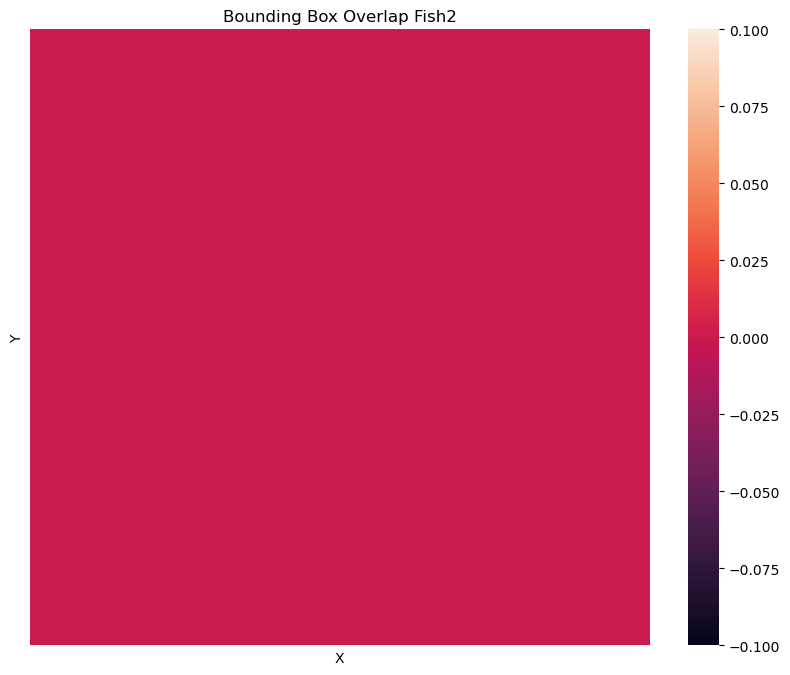

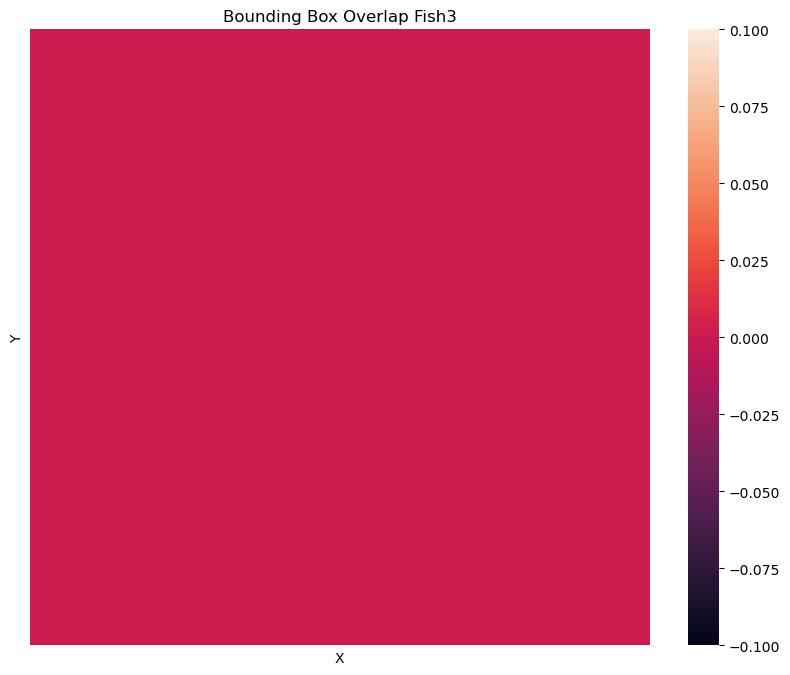

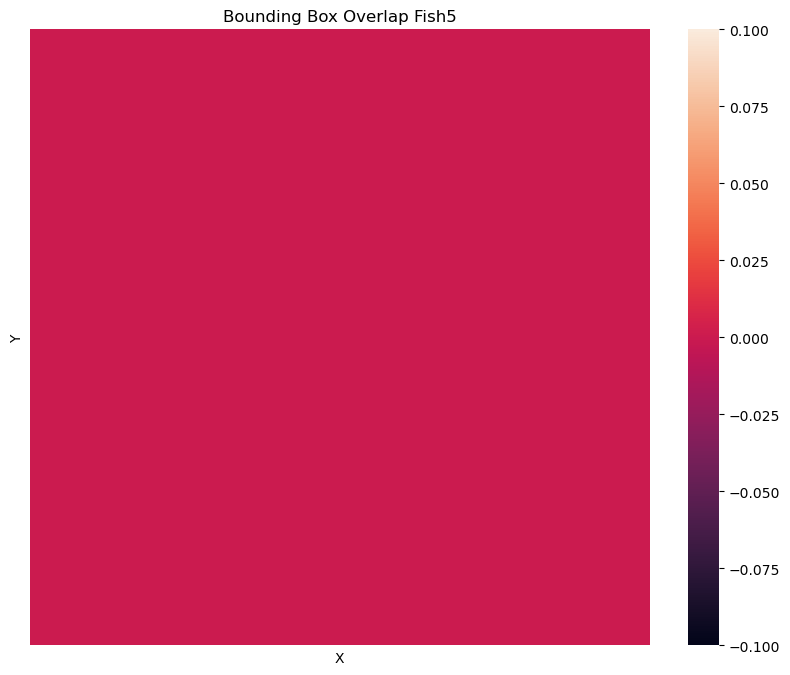

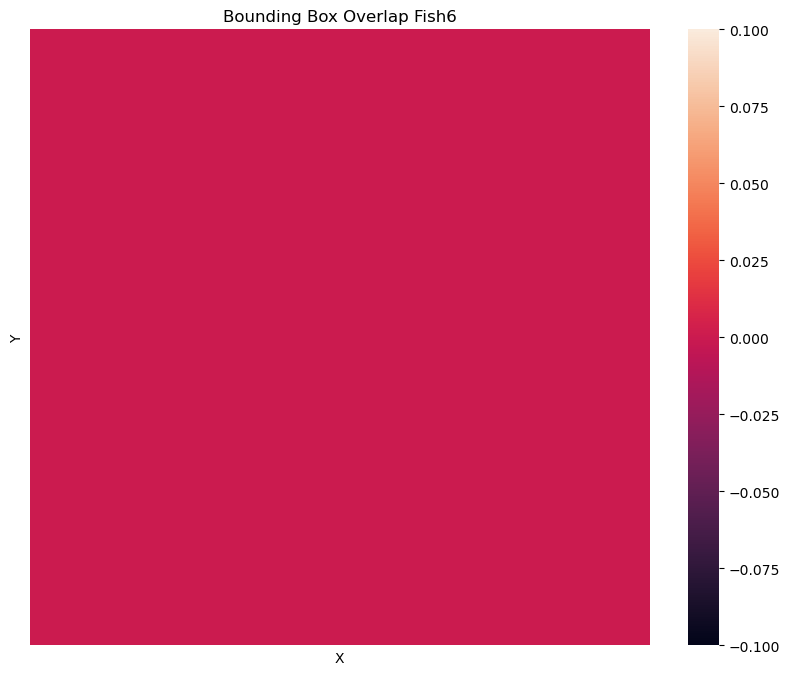

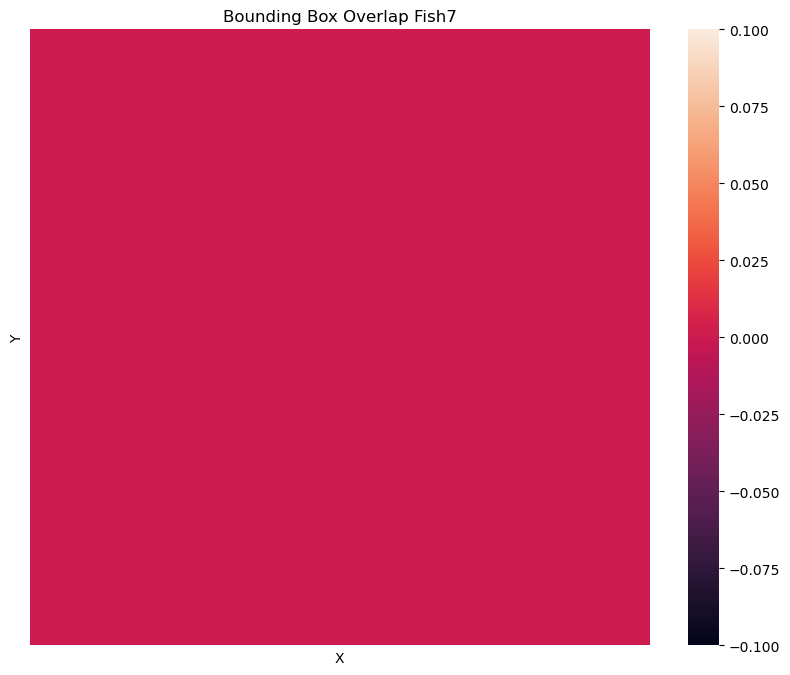

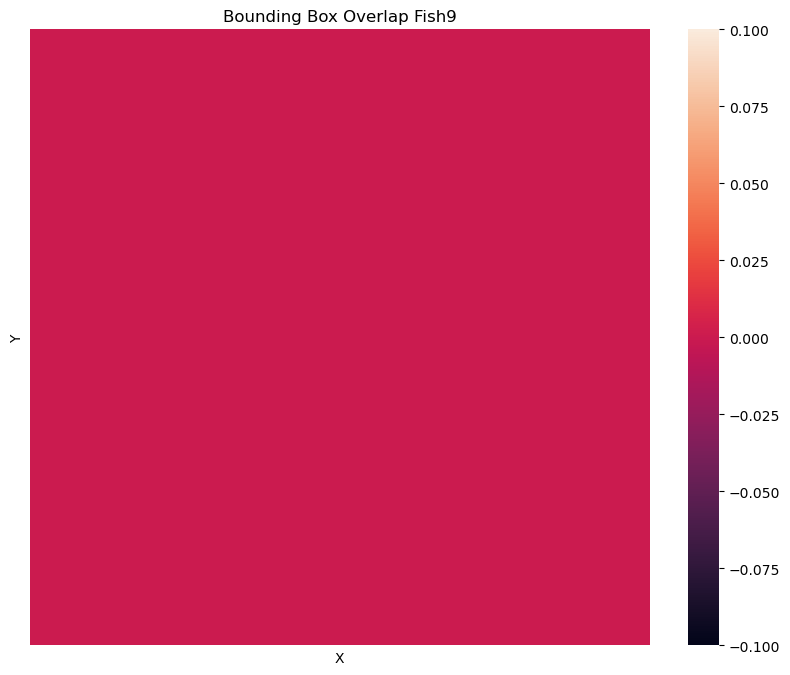

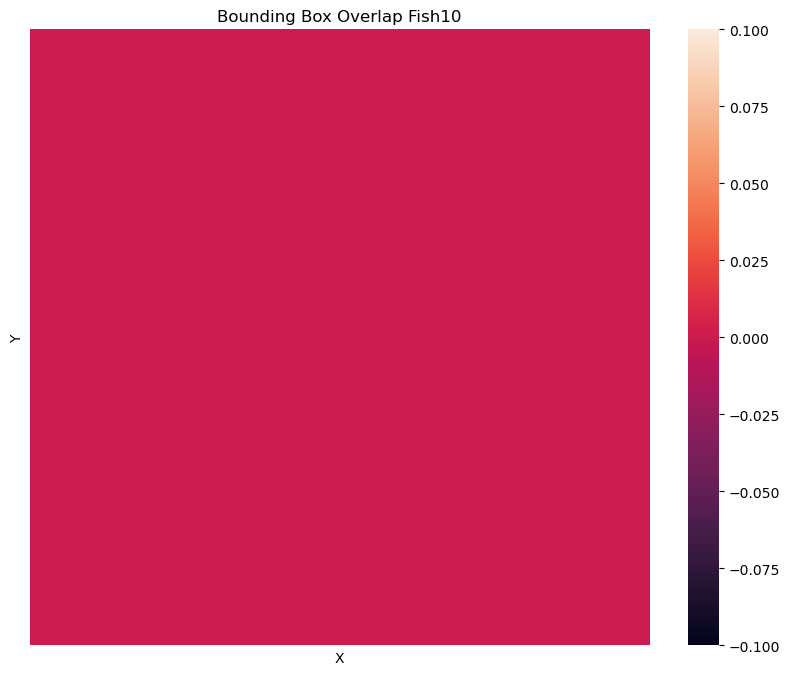

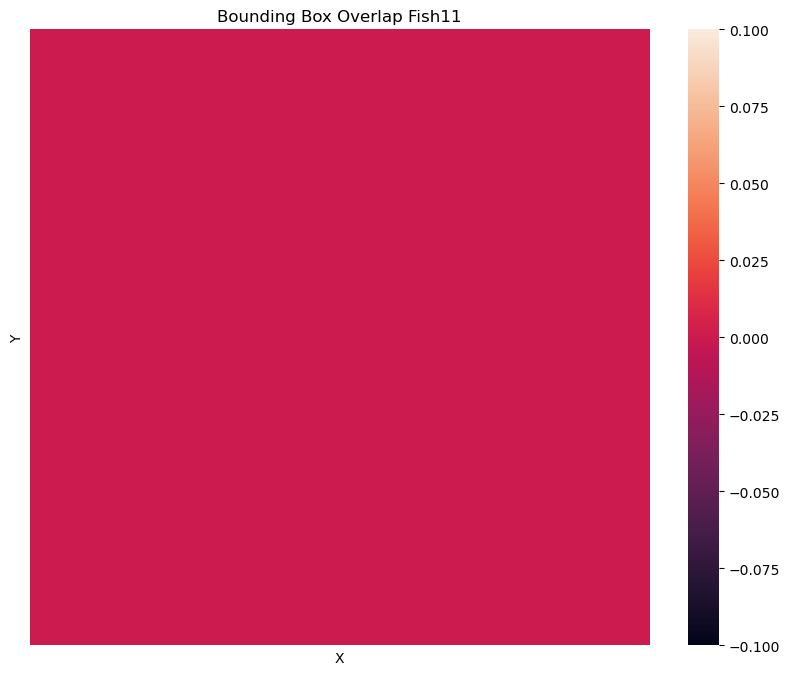

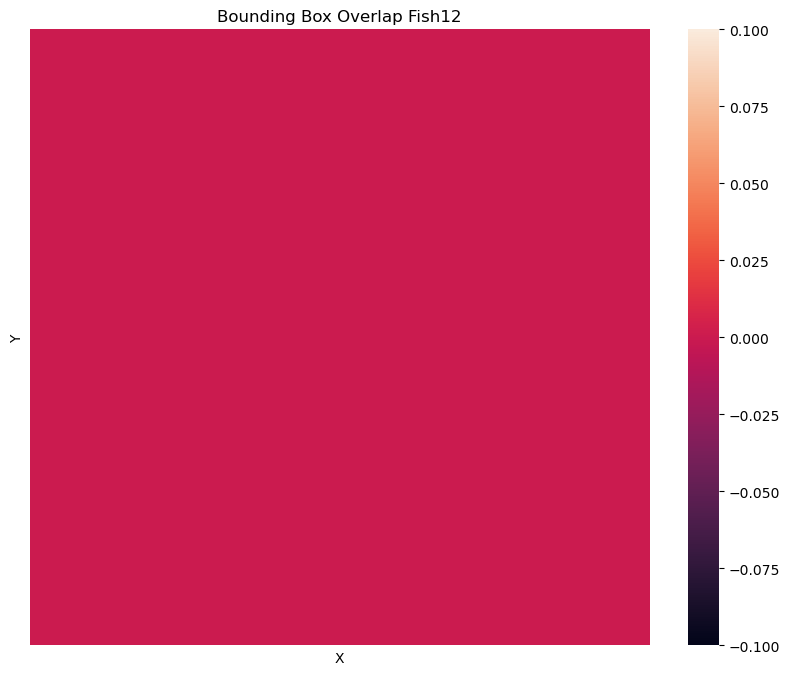

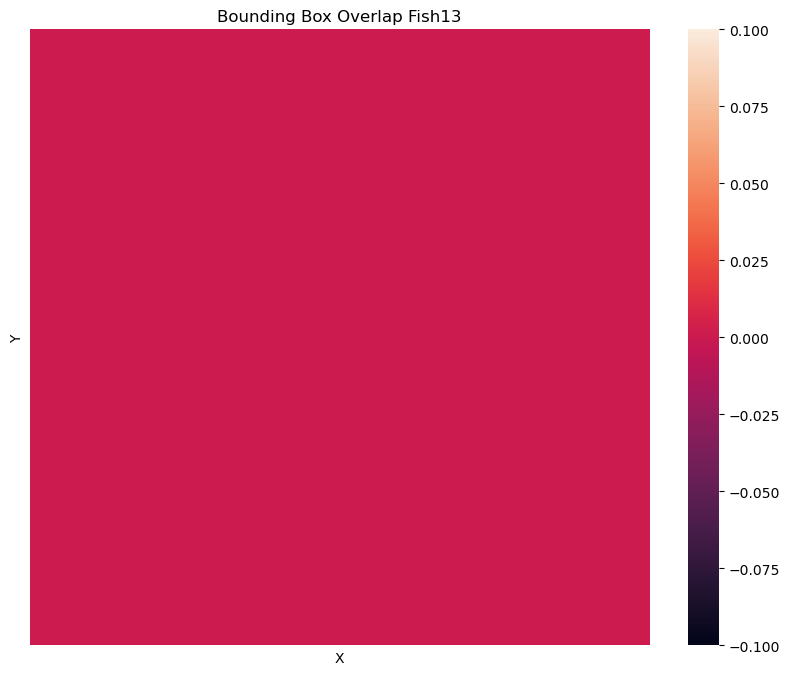

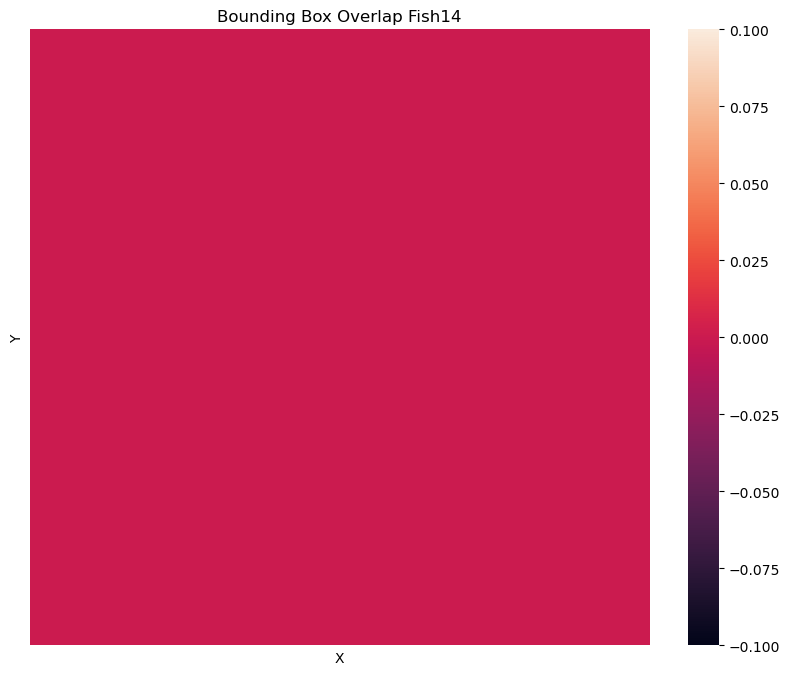

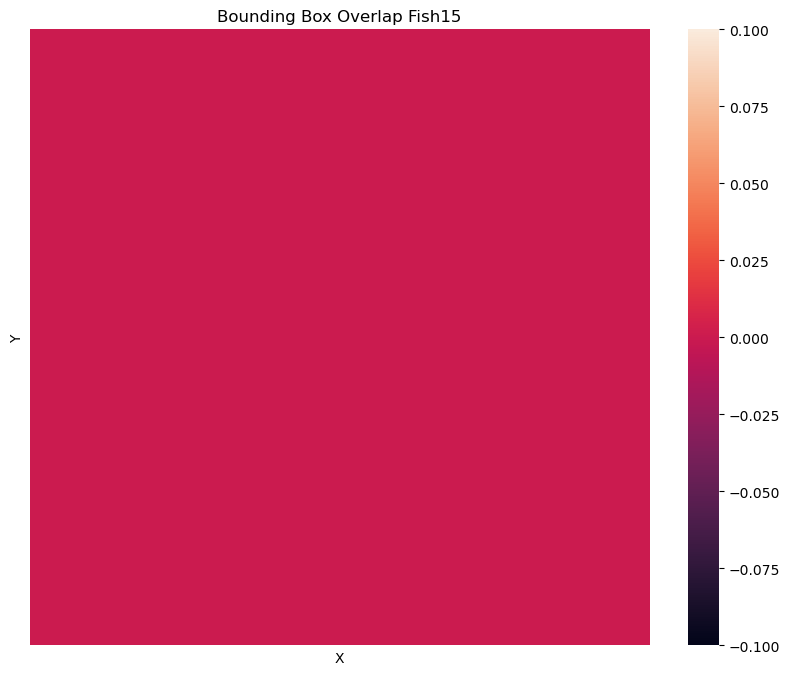

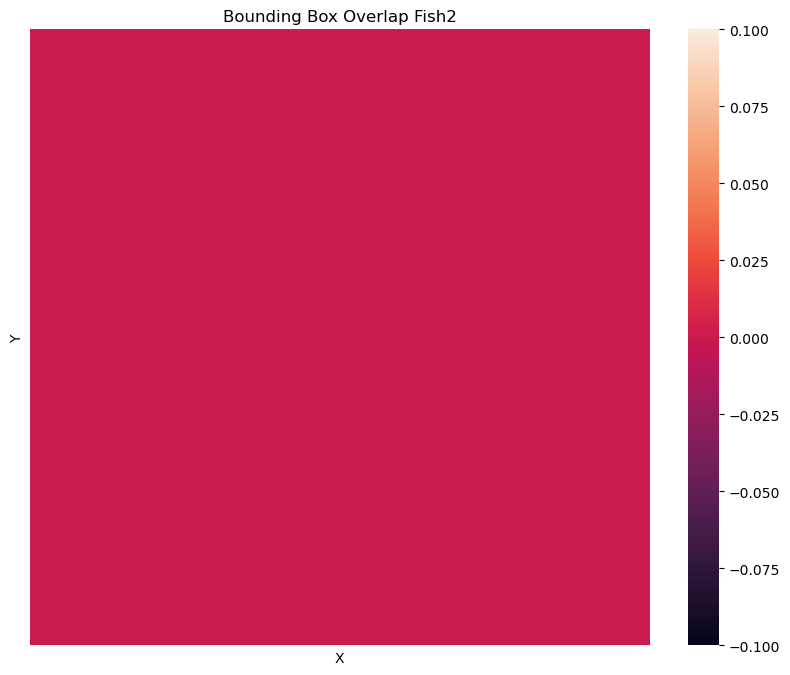

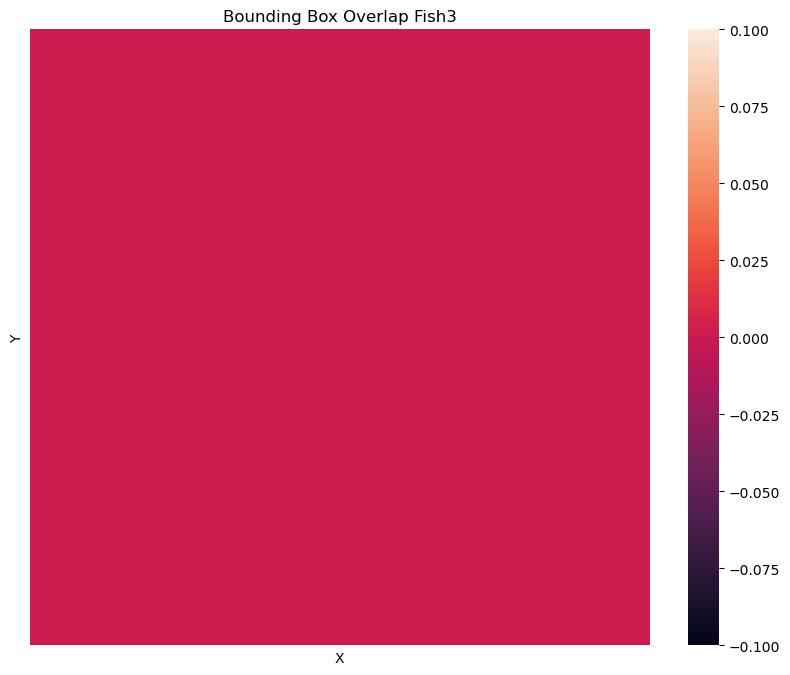

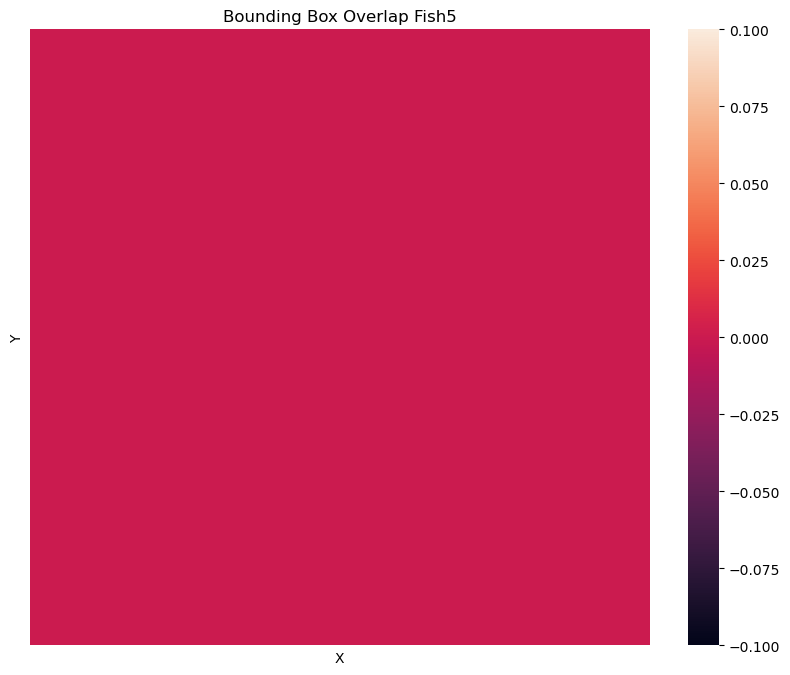

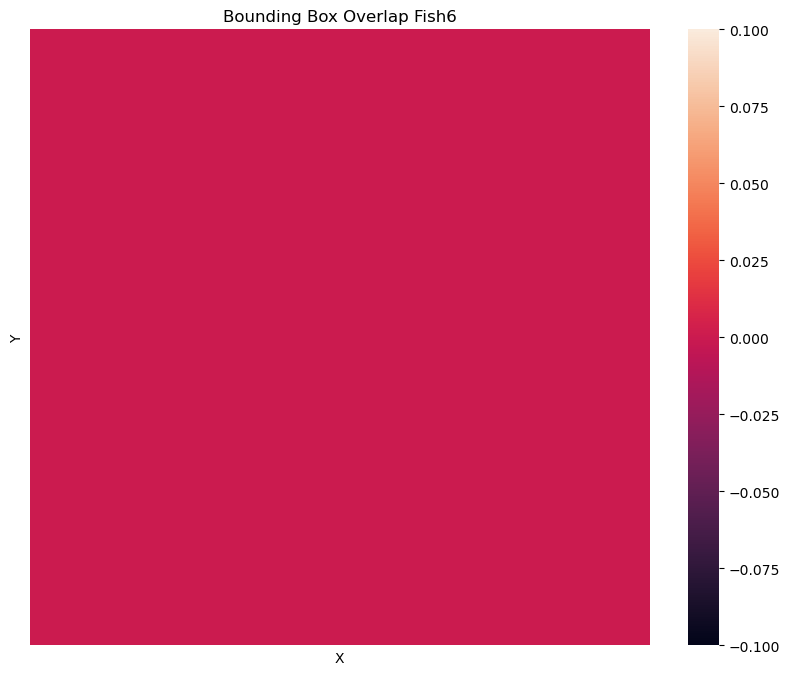

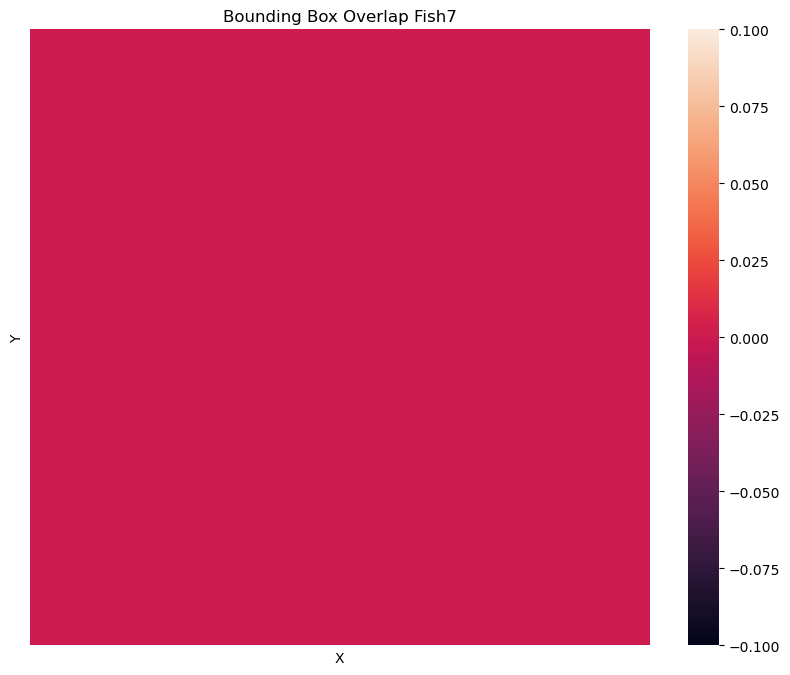

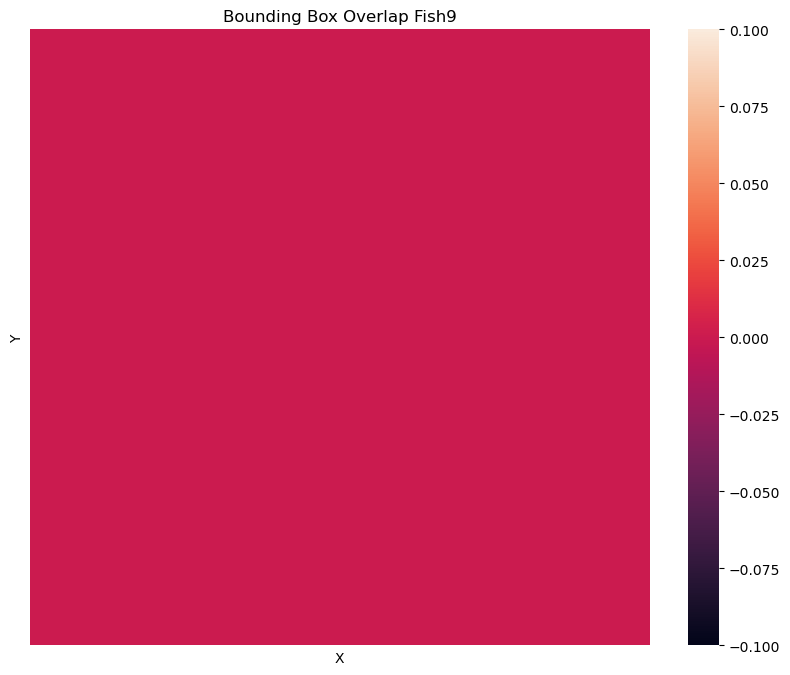

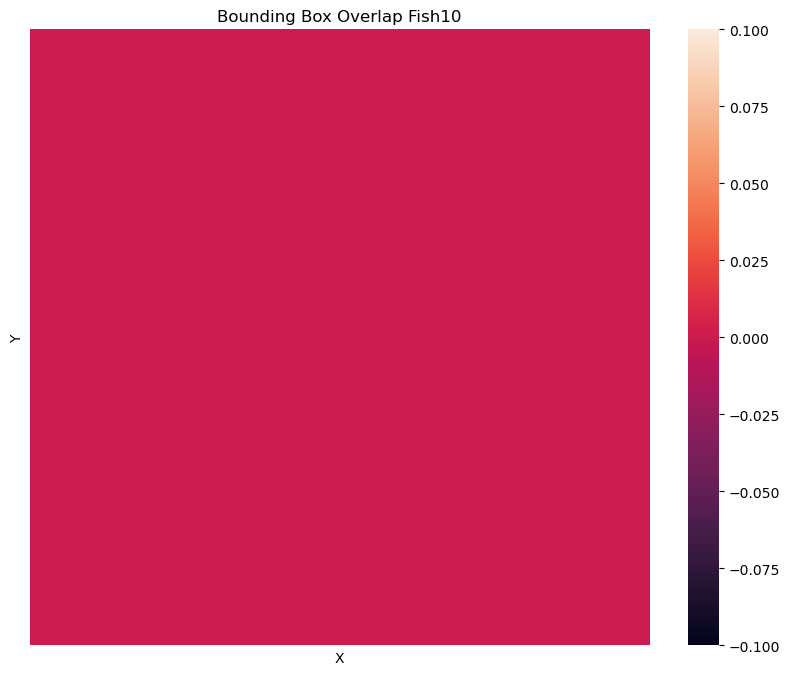

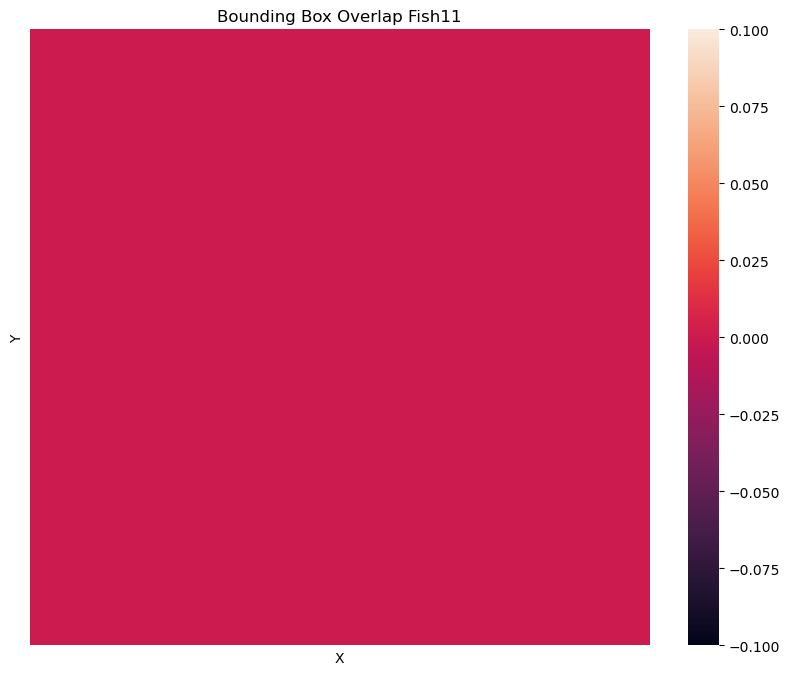

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, json

path = '/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Helfisk_Deteksjonssett/'

jsonfiles = annots = sorted(file for file in os.listdir(path) if file.endswith('.json'))

bboxes = {2:[],
          3:[],
          5:[],
          6:[],
          7:[],
          9:[],
          10:[],
          11:[],
          12:[],
          13:[],
          14:[],
          15:[]}

for jsonfile in jsonfiles:
    with open(path + jsonfile, 'r') as file:
        content = json.load(file)
        shapes = content['shapes']
        for shape in shapes:
            box = shape['points']
            bboxes[shape['group_id']].append(box)
        
# Define the size of the image frame
image_width = 1920
image_height = 1440

# Iterate over each cell in the heatmap
for y in range(image_height):
    for x in range(image_width):
        # Count the number of bounding boxes that intersect with the cell
        for fish, boxes in bboxes.items():
            # Initialize a 2D array to store the heatmap
            heatmap_data = np.zeros((image_height, image_width))
            for box in boxes:
                p1, p2 = box
                x1, y1 = p1
                x2, y2 = p2
                if x1 <= x < x2 and y1 <= y < y2:
                    heatmap_data[y, x] += 1

            # Plot the heatmap using Seaborn
            plt.figure(figsize=(10, 8))
            sns.heatmap(heatmap_data, xticklabels=False, yticklabels=False)
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Bounding Box Overlap Fish' + str(fish))
            plt.savefig('/Users/magnuswiik/Documents/NTNU/5.klasse/prosjektoppgave/FishID/figures/master/heatmap' + str(fish))



# Change filenames

In [2]:
import os

path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Helfisk_Deteksjonssett/debug/edit/"

files = sorted(os.listdir(path))

for file in files:
    oldname = os.path.join(path,file)
    newname = os.path.join(path, "GP010101_" + file)
    os.rename(oldname, newname)